In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = np.load('./17-March-KNN-master/datasets/mnist_train_small.npy')

In [3]:
dataset

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
dataset.shape

(19999, 785)

In [5]:
X = dataset[:,1:]
y = dataset[:,0]

In [6]:
X.shape,y.shape

((19999, 784), (19999,))

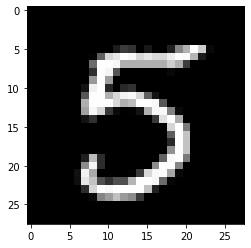

In [7]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred = knn.predict(X_test[:100])

In [12]:
knn.score(X_test[:100],y_test[:100])

0.95

In [13]:
class KnnCustom:
    def __init__(self,n_neighbors = 5):
        self.n_neighbors = n_neighbors
    def fit(self,X,y):
        self.X = (X - X.mean()) / X.std()
        self.y = y
    def predict_point(self,point):
        distances = np.sqrt(np.sum((self.X-point)**2,axis = 1))
        nearest = self.y[distances.argsort()[:self.n_neighbors]]
        item,counts = np.unique(nearest,return_counts=True)
        return item[counts.argmax()]
    def predict(self,X):
        rs = []
        X = (X - X.mean()) / X.std()
        for point in X:
            rs.append(self.predict_point(point))
        return np.array(rs)
    def score(self,X_test,y_test):
        yp = self.predict(X_test)
        return (yp==y_test).mean()

In [14]:
model = KnnCustom()

In [15]:
model.fit(X_train,y_train)

In [16]:
Y_pred = model.predict(X_test[:100])

In [17]:
model.score(X_test[:100],y_test[:100])

0.95

In [18]:
best = []
for i in range(1,40):
    print("Running Process : ",i)
    model = KnnCustom(n_neighbors=i)
    model.fit(X_train,y_train)
    best.append(model.score(X_test[:100],y_test[:100]))

Running Process :  1
Running Process :  2
Running Process :  3
Running Process :  4
Running Process :  5
Running Process :  6
Running Process :  7
Running Process :  8
Running Process :  9
Running Process :  10
Running Process :  11
Running Process :  12
Running Process :  13
Running Process :  14
Running Process :  15
Running Process :  16
Running Process :  17
Running Process :  18
Running Process :  19
Running Process :  20
Running Process :  21
Running Process :  22
Running Process :  23
Running Process :  24
Running Process :  25
Running Process :  26
Running Process :  27
Running Process :  28
Running Process :  29
Running Process :  30
Running Process :  31
Running Process :  32
Running Process :  33
Running Process :  34
Running Process :  35
Running Process :  36
Running Process :  37
Running Process :  38
Running Process :  39


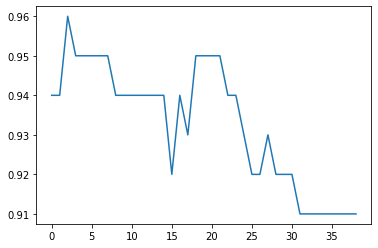

In [19]:
plt.plot(best)